In [70]:
# Francisco Lobeira
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. 
#Include these observations at the top of notebook.

#1. From the bar graphs we can conclude that the most populous regimens are Capomulin and Ramicane.
#2. Form the pie chart we can conclude that there are more female mice in the study, but not alot more.
#(Female = 50.6%, Male = 49.4%)
#3. We can conclude that the Capumilin Regimen in regards to Tummor Volume has the most outliers.

In [71]:
# Mouse data table print
mouse_metadata.head()
#len(mouse_metadata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [72]:
# Study results table print
study_results.head()
#len(study_results)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [73]:
# Understand the data
u = study_results["Mouse ID"].unique()
len(u)


249

In [74]:
# There are 249 unique values in the Mouse ID column in both data sets
# Merge the two data sets
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
combined_df.head(300)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0


In [75]:
# make sure all the rows are in th enew combined df
len(combined_df)

1893

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
u_regimen = combined_df["Drug Regimen"].unique()
u_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [77]:
## testing ##
regimen_gb = combined_df.groupby(['Drug Regimen'])
regimen_gb.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [78]:
# Extra... 
# generate a summary stat table for the entire population use tumor volume

v_mean = combined_df['Tumor Volume (mm3)'].mean()
v_median = combined_df['Tumor Volume (mm3)'].median()
v_mode = combined_df['Tumor Volume (mm3)'].mode()
v_sem = combined_df['Tumor Volume (mm3)'].sem()
v_std = combined_df['Tumor Volume (mm3)'].std()

In [79]:
#Summary Statistics fro each regimen
# I will create different data frames and then combine them to get the desired solution
mean_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean().reset_index()
median_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median().reset_index()
sem_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem().reset_index()
std_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std().reset_index()

In [80]:
# Merge all the data frames to have a single table with all the info
mergeOne = pd.merge(mean_df, median_df, on = "Drug Regimen", how = "outer")
mergeTwo = pd.merge(mergeOne, sem_df, on = "Drug Regimen", how = "outer")
summaryStats = pd.merge(mergeTwo, std_df, on = "Drug Regimen", how = "outer")
summaryStats

,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,40.675741,41.557809,0.329346,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,6.268188
2,Infubinol,52.884795,51.820584,0.492236,6.567243
3,Ketapril,55.235638,53.698743,0.603860,8.279709
4,Naftisol,54.331565,52.509285,0.596466,8.134708
5,Placebo,54.033581,52.288934,0.581331,7.821003
6,Propriva,52.322552,50.854632,0.512884,6.507770
7,Ramicane,40.216745,40.673236,0.320955,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,6.966589


In [81]:
# Rename teh columns so thet it makes sense
summaryStats.columns= ['Drug Regimen', 'Average', 'Median', 'SME', "STD"]
summaryStats

,Drug Regimen,Average,Median,SME,STD
0,Capomulin,40.675741,41.557809,0.329346,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,6.268188
2,Infubinol,52.884795,51.820584,0.492236,6.567243
3,Ketapril,55.235638,53.698743,0.603860,8.279709
4,Naftisol,54.331565,52.509285,0.596466,8.134708
5,Placebo,54.033581,52.288934,0.581331,7.821003
6,Propriva,52.322552,50.854632,0.512884,6.507770
7,Ramicane,40.216745,40.673236,0.320955,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,6.966589


Text(0, 0.5, 'Count')

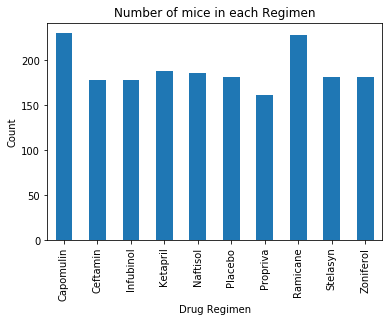

In [82]:
# Using DataFrame.plot
regimen_count_df = combined_df.groupby(['Drug Regimen'])['Age_months'].count()
regimen_count_df.plot.bar()
plt.title("Number of mice in each Regimen")
plt.ylabel("Count")

In [83]:
# Using Matplotlib's pyplot
regimen_count_df = combined_df.groupby(['Drug Regimen'])['Age_months'].count()
x_axis = np.arange(len(regimen_count_df))


Text(0.5, 0, 'Drug Regimen')

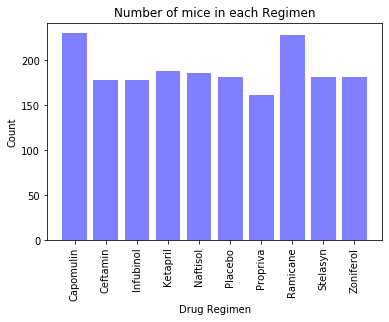

In [84]:
plt.bar(x_axis, regimen_count_df, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation = 90)
plt.title("Number of mice in each Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

Text(0.5, 1.0, 'Male vs Female')

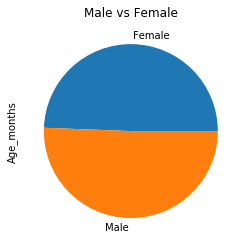

In [85]:
# Using DataFrame.plot
sex = combined_df.groupby(['Sex'])['Age_months'].count()
sex.plot.pie()
plt.title("Male vs Female")

([<matplotlib.patches.Wedge at 0x126c302b388>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Male'),
  Text(0.7230187918402547, 0.8290017048509963, 'Female')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

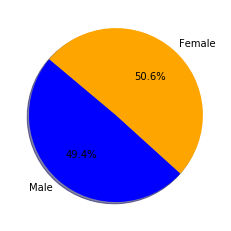

In [86]:
labels = ["Male","Female"]
sizes = sex
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [87]:
#Create 4 data frames for the 4 regimens we wan to analize (Capomulin, Ramicane, Infubinol, and Ceftamin.)
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane"]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol"]
caftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [88]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
cap_finalV = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
ram_finalV = ramicane_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
inf_finalV = infubinol_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
caft_finalV = caftamin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
cap_finalV

,Tumor Volume (mm3),Timepoint
Mouse ID,,
b128,45.651331,45
b742,45.000000,45
f966,45.000000,20
g288,46.304003,45
g316,46.809225,45
i557,47.685963,45
i738,45.595685,45
j119,48.158209,45
j246,46.408361,35


In [89]:
# Calculate the final tumor volume of each mouse across Ramicane
ram_finalV

,Tumor Volume (mm3),Timepoint
Mouse ID,,
a411,45.466677,45
a444,45.000000,45
a520,45.000000,45
a644,46.910892,45
c458,45.722279,30
c758,46.940945,45
d251,45.000000,45
e662,46.409084,45
g791,45.851531,45


In [90]:
# Calculate the final tumor volume of each mouse across Infubinol
inf_finalV

,Tumor Volume (mm3),Timepoint
Mouse ID,,
a203,67.973419,45
a251,65.525743,45
a577,57.031862,30
a685,66.083066,45
c139,72.226731,45
c326,45.000000,5
c895,60.969711,30
e476,62.435404,45
f345,60.918767,45


In [91]:
# Calculate the final tumor volume of each mouse across Caftamin
caft_finalV

,Tumor Volume (mm3),Timepoint
Mouse ID,,
a275,62.999356,45
b447,45.000000,0
b487,56.057749,25
b759,55.742829,30
f436,48.722078,15
h531,47.784682,5
j296,61.849023,45
k210,68.923185,45
l471,67.748662,45


In [92]:
# Determine if there are any potential outliers in capomulin
quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 37.685932865
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 7.314067135000002
The the median of occupancy is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [93]:
# Determine if there are any potential outliers in capomulin
quartiles2 = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles[0.75]
iqr2 = upperq2-lowerq2

print(f"The lower quartile of occupancy is: {lowerq2}")
print(f"The upper quartile of occupancy is: {upperq2}")
print(f"The interquartile range of occupancy is: {iqr2}")
print(f"The the median of occupancy is: {quartiles2[0.5]} ")

lower_bound2 = lowerq2 - (1.5*iqr)
upper_bound2 = upperq2 + (1.5*iqr)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

outlier_occupancy2 = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < lower_bound2) | (ramicane_df['Tumor Volume (mm3)'] > upper_bound2)]
outlier_occupancy2

The lower quartile of occupancy is: 37.685932865
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 7.314067135000002
The the median of occupancy is: 40.67323554 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [94]:
# Determine if there are any potential outliers in infubinol
quartiles3 = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq3 = quartiles[0.25]
upperq3 = quartiles[0.75]
iqr3 = upperq3-lowerq3

print(f"The lower quartile of occupancy is: {lowerq3}")
print(f"The upper quartile of occupancy is: {upperq3}")
print(f"The interquartile range of occupancy is: {iqr3}")
print(f"The the median of occupancy is: {quartiles3[0.5]} ")

lower_bound3 = lowerq3 - (1.5*iqr)
upper_bound3 = upperq3 + (1.5*iqr)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

outlier_occupancy3 = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < lower_bound3) | (infubinol_df['Tumor Volume (mm3)'] > upper_bound3)]
outlier_occupancy3

The lower quartile of occupancy is: 37.685932865
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 7.314067135000002
The the median of occupancy is: 51.82058438 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2
469,a251,Infubinol,Female,21,25,25,57.414646,1
470,a251,Infubinol,Female,21,25,30,59.861241,1
471,a251,Infubinol,Female,21,25,35,60.903885,1
472,a251,Infubinol,Female,21,25,40,63.095076,1
473,a251,Infubinol,Female,21,25,45,65.525743,1


In [95]:
# Determine if there are any potential outliers in caftamin
quartiles = caftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = caftamin_df.loc[(caftamin_df['Tumor Volume (mm3)'] < lower_bound) | (caftamin_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 47.208427112500004
The upper quartile of occupancy is: 56.801437570000004
The interquartile range of occupancy is: 9.5930104575
The the median of occupancy is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


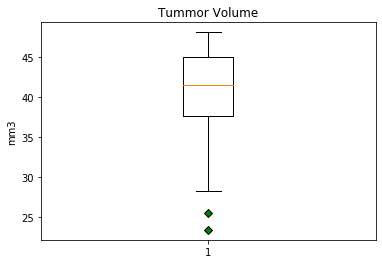

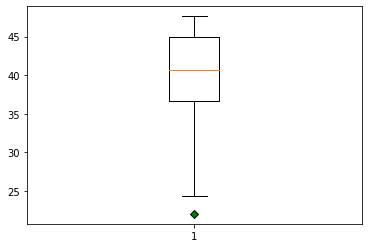

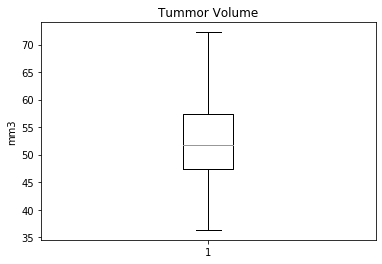

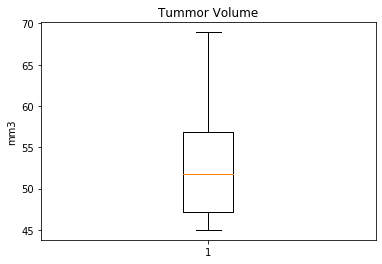

In [96]:
# Create a box plot
capBox = capomulin_df['Tumor Volume (mm3)']
ramBox = ramicane_df['Tumor Volume (mm3)']
infBox = infubinol_df['Tumor Volume (mm3)']
cafBox = caftamin_df['Tumor Volume (mm3)']

green_diamond = dict(markerfacecolor='g', marker='D')


fig1, ax1 = plt.subplots()
ax1.set_title('Tummor Volume')
ax1.set_ylabel('mm3')
ax1.boxplot(capBox,flierprops=green_diamond)

fig2, ax2 = plt.subplots()
ax1.set_title('Tummor Volume')
ax1.set_ylabel('mm3')
ax2.boxplot(ramBox,flierprops=green_diamond)

fig3, ax3 = plt.subplots()
ax3.set_title('Tummor Volume')
ax3.set_ylabel('mm3')
ax3.boxplot(infBox,flierprops=green_diamond)

fig4, ax4 = plt.subplots()
ax4.set_title('Tummor Volume')
ax4.set_ylabel('mm3')
ax4.boxplot(cafBox,flierprops=green_diamond)

plt.show()

In [ ]:
#Wisker Plot
capMean = capomulin_df['Tumor Volume (mm3)'].mean()
capSE = [sem(capomulin_df['Tumor Volume (mm3)'])
capX = np.arange(0, 230 , 1) + 1


In [ ]:
#Line plot 
single = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]


plt.plot(single["Timepoint"],single["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("mm3")
plt.title("Timepoint vs tumor volume ")
plt.show()

In [ ]:
# Scatter Plot 

plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("mm3")
plt.title("Weight vs tumor volume ")
plt.show()

In [ ]:
# Liniear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
regress_values = capomulin_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
plt.plot(capomulin_df["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Weight vs tumor volume ")
plt.xlabel('mm3')
plt.ylabel('Weight')
plt.show()

In [ ]:
# Correlation
correlation = st.pearsonr(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")